<a href="https://colab.research.google.com/github/santhosh1728/fun_with_nlp/blob/main/spam_textClassification_NLP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
x = ['which book is this ','this is book and this is math']

In [4]:
cv = CountVectorizer()
count = cv.fit_transform(x)

In [5]:
count.toarray()  # BoW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]])

In [6]:
cv.get_feature_names_out()

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [7]:
bow = pd.DataFrame(count.toarray() , columns = cv.get_feature_names_out())

In [8]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


# Term Frequency

In [9]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [10]:
bow.shape

(2, 6)

In [11]:
tf = bow.copy()
for index,row in enumerate(tf.iterrows()):
  for col in row[1].index:
    tf.loc[index,col] = tf.loc[index,col]/sum(row[1].values)



In [12]:
x

['which book is this ', 'this is book and this is math']

In [13]:
for index, row in enumerate(tf.iterrows()):
  print(row[1])

and      0.00
book     0.25
is       0.25
math     0.00
this     0.25
which    0.25
Name: 0, dtype: float64
and      0.142857
book     0.142857
is       0.285714
math     0.142857
this     0.285714
which    0.000000
Name: 1, dtype: float64


In [14]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


#Inverse Document Frequency IDF

In [15]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [16]:
bb = bow.astype('bool')
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [17]:
bb['is'].sum()

2

In [18]:
x


['which book is this ', 'this is book and this is math']

In [19]:
cols = bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [20]:
nz = []        # -> non zero
for col in cols:
  nz.append(bb['is'].sum())
nz

[2, 2, 2, 2, 2, 2]

In [21]:
nz = []
for col in cols:
  nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [22]:
N = 2
idf = []
for index , col in enumerate(cols):
  idf.append(np.log(N + 1)/(nz[index] + 1) + 1)

In [23]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [24]:
x

['which book is this ', 'this is book and this is math']

#TFIDF  =  TF*IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
x

['which book is this ', 'this is book and this is math']

In [27]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [28]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [29]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [30]:
idf

[1.549306144334055,
 1.3662040962227033,
 1.3662040962227033,
 1.549306144334055,
 1.3662040962227033,
 1.549306144334055]

In [31]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


In [32]:
 df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv", sep = '\t')
# df = pd.read_csv('spam.csv')

In [33]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [34]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [35]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [36]:
df.shape

(5572, 4)

In [37]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Balance Dataset

In [38]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [39]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [40]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [41]:
ham = ham.sample(spam.shape[0])

In [42]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [43]:
df = ham.append(spam,ignore_index=True)

<ipython-input-43-fb0b0aff8b45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = ham.append(spam,ignore_index=True)


In [44]:
df.shape

(1494, 4)

In [45]:
df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [46]:
df.shape

(1494, 4)

In [47]:
df

,label,message,length,punct
0,ham,Fffff. Can you text kadeem or are you too far ...,50,1
1,ham,You have registered Sinco as Payee. Log in at ...,155,10
2,ham,So check your errors and if you had difficulti...,64,2
3,ham,I dont thnk its a wrong calling between us,42,0
4,ham,I actually did for the first time in a while. ...,130,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [48]:
import matplotlib.pyplot as plt


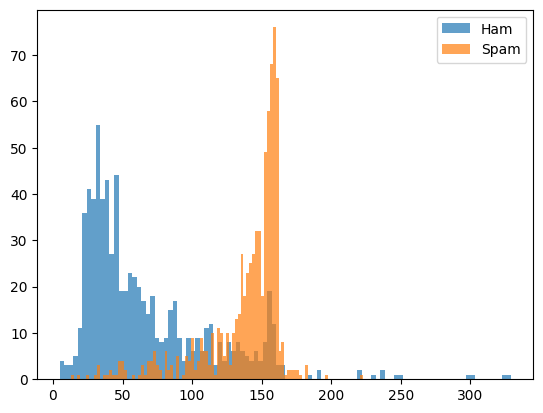

In [49]:
plt.hist(ham['length'],bins = 100, alpha = 0.7,label = 'Ham')
plt.hist(spam['length'],bins = 100, alpha = 0.7,label = 'Spam')
plt.legend()
plt.show()



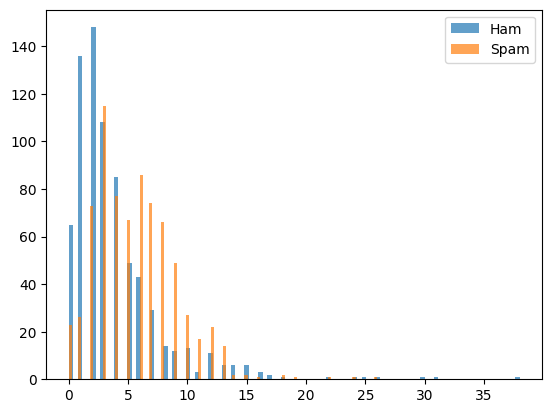

In [50]:
plt.hist(ham['punct'],bins = 100, alpha = 0.7,label = 'Ham')
plt.hist(spam['punct'],bins = 100, alpha = 0.7,label = 'Spam')
plt.legend()
plt.show()



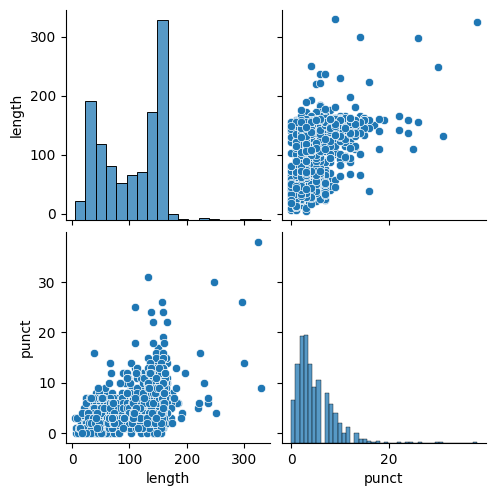

In [51]:
sns.pairplot(df)

## Data Preparation for Training

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
df.head()

,label,message,length,punct
0,ham,Fffff. Can you text kadeem or are you too far ...,50,1
1,ham,You have registered Sinco as Payee. Log in at ...,155,10
2,ham,So check your errors and if you had difficulti...,64,2
3,ham,I dont thnk its a wrong calling between us,42,0
4,ham,I actually did for the first time in a while. ...,130,4


In [55]:
 tfidf = TfidfVectorizer()
 X = tfidf.fit_transform(df['message'])

In [56]:
X = X.toarray()

In [57]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
X.shape

(1494, 4468)

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,df['label'],test_size = 0.2,random_state = 0,stratify = df['label'] )

In [60]:
X_train.shape , X_test.shape

((1195, 4468), (299, 4468))

# Training Text Classifer

In [61]:
clf = RandomForestClassifier(n_estimators = 100,n_jobs = -1)

 n_jobs -> how many computer code we want to train our random forest algorithm so -1 says that use all code present  in the computer system to train our model

In [62]:
clf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1)

In [63]:
Y_pred = clf.predict(X_test)

In [64]:
confusion_matrix(Y_test,Y_pred)

array([[148,   2],
       [ 15, 134]])

In [65]:
accuracy = accuracy_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.9431438127090301


In [66]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       150
        spam       0.99      0.90      0.94       149

    accuracy                           0.94       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.94      0.94       299



In [67]:
def predict(X):
  x=tfidf.transform([X])
  x=x.toarray()
  pred = clf.predict(x)
  return pred

In [68]:
predict("hey, whatsapp")

array(['ham'], dtype=object)

In [69]:
predict("you have got free tickets to the usa this summer")

array(['ham'], dtype=object)

In [70]:
predict("amo ra babu..")

array(['ham'], dtype=object)

In [71]:
predict("fuck")

array(['ham'], dtype=object)

In [72]:
predict("prasad will provide you all kind of knowledge for usa trip")

array(['ham'], dtype=object)

In [73]:
predict("i will provide any information")

array(['ham'], dtype=object)

In [74]:
df['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load the dataset
# df2 = pd.read_csv("spam.csv", encoding="latin-1")
df2 = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/spam.tsv", sep = '\t')
df2['label'] = df2['label'].map({'ham': 0, 'spam': 1})

# Split the data into features (X) and labels (y)
X = df2['message']
y = df2['label']

# Create a CountVectorizer to convert text data into numerical features
cv = CountVectorizer()
X = cv.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Create and train a Multinomial Naive Bayes classifier
clf2 = MultinomialNB()
clf2.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test set
y_pred2 = clf2.predict(X_test)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)

print("Accuracy:", accuracy)


Accuracy: 0.9836867862969005


In [76]:
from sklearn.metrics import classification_report

# Use the trained classifier to make predictions on the test set
y_pred2 = clf2.predict(X_test)

# Calculate classification report
class_report = classification_report(y_test, y_pred2, target_names=['ham', 'spam'])
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1593
        spam       0.92      0.96      0.94       246

    accuracy                           0.98      1839
   macro avg       0.96      0.97      0.97      1839
weighted avg       0.98      0.98      0.98      1839

